In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [74]:
data = pd.read_csv("/content/gdrive/MyDrive/Datasets/insurance.csv")

In [75]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [76]:
data.isnull().sum()
data = pd.DataFrame(data)
data = data.dropna()

In [77]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "sex", color = "smoker", title= "Number of Smokers")
figure.show()


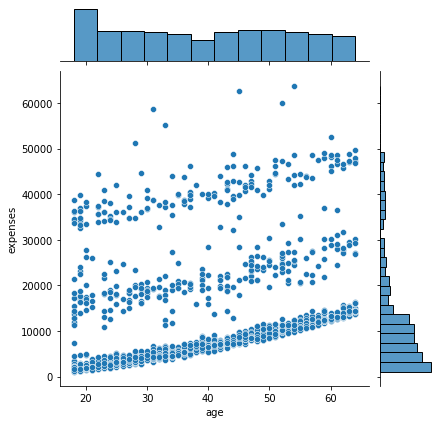

In [78]:
import seaborn as sns

sns.jointplot(x = data['age'], y= data['expenses'])

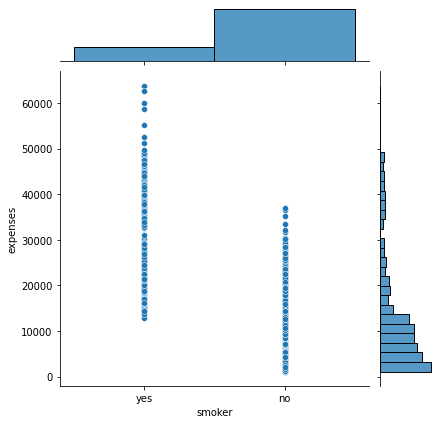

In [79]:
sns.jointplot(x=data['smoker'],y=data['expenses'])

In [80]:
data["sex"] = data["sex"].map({"female": 0, "male": 1})
data["smoker"] = data["smoker"].map({"no": 0, "yes": 1})
print(data.head())

   age  sex   bmi  children  smoker     region  expenses
0   19    0  27.9         0       1  southwest  16884.92
1   18    1  33.8         1       0  southeast   1725.55
2   28    1  33.0         3       0  southeast   4449.46
3   33    1  22.7         0       0  northwest  21984.47
4   32    1  28.9         0       0  northwest   3866.86


In [81]:
import plotly.express as px
pie = data["region"].value_counts()
regions = pie.index
population = pie.values
fig = px.pie(data, values=population, names=regions)
fig.show()

In [82]:
print(data.corr())

               age       sex       bmi  children    smoker  expenses
age       1.000000 -0.020856  0.109341  0.042469 -0.025019  0.299008
sex      -0.020856  1.000000  0.046380  0.017163  0.076185  0.057292
bmi       0.109341  0.046380  1.000000  0.012645  0.003968  0.198576
children  0.042469  0.017163  0.012645  1.000000  0.007673  0.067998
smoker   -0.025019  0.076185  0.003968  0.007673  1.000000  0.787251
expenses  0.299008  0.057292  0.198576  0.067998  0.787251  1.000000


In [83]:
x = np.array(data[["age", "sex", "bmi", "smoker"]])
y = np.array(data["expenses"])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [84]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(xtrain, ytrain)

RandomForestRegressor()

In [85]:
ypred = forest.predict(xtest)
data = pd.DataFrame(data={"Predicted Premium Amount": ypred})
print(data.head())

   Predicted Premium Amount
0               9763.720400
1               5495.181000
2              28305.030100
3               9616.185600
4              34764.543394


In [86]:
forest.score(xtest, ytest)

0.8462223402814701